### Imports

In [1]:
import os
from matplotlib import pyplot as plt
from skimage import img_as_ubyte, io, color
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import time
from sklearn import metrics
from joblib import dump

### Creating path varibales and a function for fetching the data

In [2]:
train_path = 'CW_Dataset_current/train'
test_path = 'CW_Dataset_current/test'

"""
The following function get_data was provided from the tutorial, with major modification from me to suit my model
"""

def get_data(folder_path):
    print("Fetching data...")
    images = []
    labels = []
    folder_names = [folder for folder in sorted(os.listdir(folder_path)) if not folder.startswith('.')]
    
    for folder in folder_names:
        file_names = [file for file in sorted(os.listdir(os.path.join(folder_path, folder))) if file.endswith('.jpg')]
        for file in file_names:    
            img = io.imread(os.path.join(folder_path, folder, file))
            images.append(img)
            labels.append(folder)
    
    print("Done!")
    return images, labels

### Fetching the Data

In [3]:
X, y = get_data(train_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

Fetching data...
Done!


### Generating Histograms of Gradients for every image in the train set

Generating HOG features...
Feature Descriptor time: 56.85809302330017


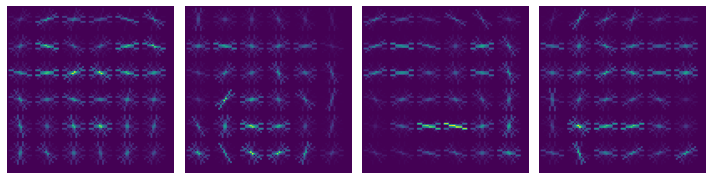

Done!


In [4]:
print("Generating HOG features...")
start_time = time.time()
fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)

ppc = 16
hog_features_train = []

"""
The following code was provided by me until the end block mark
"""

for i in range(len(X_train)):
    img = img_as_ubyte(color.rgb2gray(X_train[i]))
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True)
    hog_features_train.append(fd)
    
    if i < 4:
        ax[i].imshow(hog_image)
        ax[i].set_axis_off()

print(f"Feature Descriptor time: {time.time() - start_time}s")
fig.tight_layout()
plt.show()

"""
End block
"""
        
print("Done!")

### Feeding the Histograms of Gradients to a MLP classifier in order to train it

In [5]:
#Training a classifier
start_time = time.time()
print("Training MLP...")
classifier = MLPClassifier(alpha=0.01, max_iter=500, verbose=True)

classifier.fit(hog_features_train, y_train)
print("Done!")

print(f"Training time: {time.time() - start_time}")

Training MLP...
Iteration 1, loss = 1.89955690
Iteration 2, loss = 1.77201855
Iteration 3, loss = 1.67317235
Iteration 4, loss = 1.59091025
Iteration 5, loss = 1.54442988
Iteration 6, loss = 1.49107835
Iteration 7, loss = 1.45172812
Iteration 8, loss = 1.43177773
Iteration 9, loss = 1.40589594
Iteration 10, loss = 1.38879211
Iteration 11, loss = 1.36943145
Iteration 12, loss = 1.35006019
Iteration 13, loss = 1.34036767
Iteration 14, loss = 1.32135777
Iteration 15, loss = 1.31036987
Iteration 16, loss = 1.30457626
Iteration 17, loss = 1.28974909
Iteration 18, loss = 1.28980655
Iteration 19, loss = 1.27934717
Iteration 20, loss = 1.26994359
Iteration 21, loss = 1.26338551
Iteration 22, loss = 1.25587983
Iteration 23, loss = 1.24979338
Iteration 24, loss = 1.24258300
Iteration 25, loss = 1.23726597
Iteration 26, loss = 1.23741041
Iteration 27, loss = 1.22564573
Iteration 28, loss = 1.22094420
Iteration 29, loss = 1.21909311
Iteration 30, loss = 1.20896113
Iteration 31, loss = 1.20245532
I

Iteration 254, loss = 0.60776681
Iteration 255, loss = 0.60012605
Iteration 256, loss = 0.59153113
Iteration 257, loss = 0.59890587
Iteration 258, loss = 0.59910082
Iteration 259, loss = 0.58797689
Iteration 260, loss = 0.58197990
Iteration 261, loss = 0.58840506
Iteration 262, loss = 0.58336510
Iteration 263, loss = 0.58179017
Iteration 264, loss = 0.59205587
Iteration 265, loss = 0.59128391
Iteration 266, loss = 0.57142595
Iteration 267, loss = 0.57304117
Iteration 268, loss = 0.56934568
Iteration 269, loss = 0.57284992
Iteration 270, loss = 0.56378232
Iteration 271, loss = 0.56397127
Iteration 272, loss = 0.55785935
Iteration 273, loss = 0.55793415
Iteration 274, loss = 0.56716394
Iteration 275, loss = 0.55633984
Iteration 276, loss = 0.55958972
Iteration 277, loss = 0.55271527
Iteration 278, loss = 0.54972977
Iteration 279, loss = 0.54622635
Iteration 280, loss = 0.54747914
Iteration 281, loss = 0.54542145
Iteration 282, loss = 0.55708691
Iteration 283, loss = 0.53984530
Iteration 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Saving the model

In [7]:
print("Dumping the model...")
dump(classifier, 'HOG-MLP.joblib') 
print("Done!")

Dumping the model...
Done!


### Testing the model

Testing the model on the test set...
Testing time: 14.365521907806396


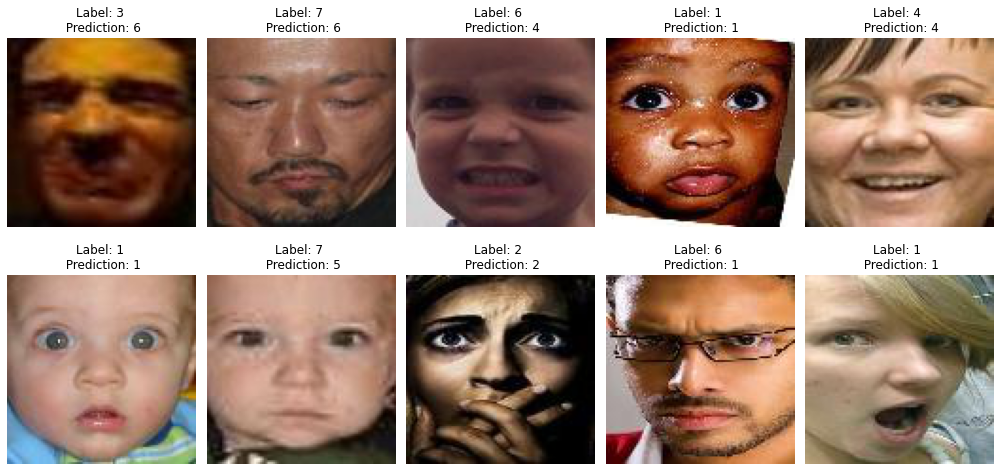


Label explanation:
1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral
      
Classification report for classifier 
 MLPClassifier(alpha=0.01, max_iter=500, verbose=True):
                    precision    recall  f1-score   support

           1       0.54      0.60      0.57       300
           2       0.87      0.82      0.84       300
           3       0.58      0.56      0.57       300
           4       0.60      0.65      0.62       300
           5       0.45      0.56      0.50       300
           6       0.78      0.65      0.71       300
           7       0.40      0.33      0.36       300

    accuracy                           0.59      2100
   macro avg       0.60      0.59      0.60      2100
weighted avg       0.60      0.59      0.60      2100




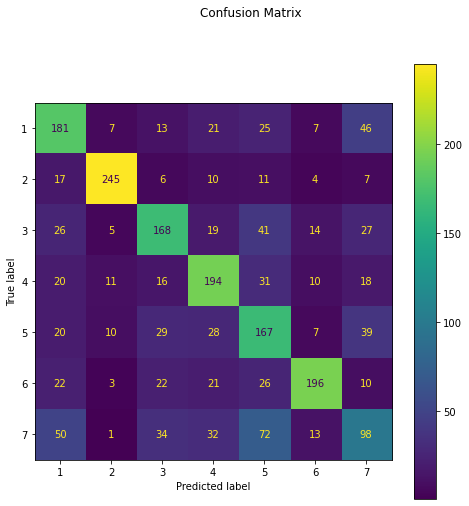

Done! End of Program.


In [8]:
print("Testing the model on the test set...")
start_time = time.time()

"""
The following code until the end block mark was implemented from the tutorial with minor adjustsments to fit my model
"""

hog_features_test = []
for image in X_test:
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True)
    hog_features_test.append(fd)

predicted = classifier.predict(hog_features_test)

print(f"Testing time: {time.time() - start_time}")

fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test[i])
    ax[i].set_title(f'Label: {y_test[i]} \n Prediction: {predicted[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

"""
End block
"""

print("""
Label explanation:
1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral
      """)
print(f"""Classification report for classifier \n {classifier}:
      {metrics.classification_report(y_test, predicted)}\n""")

fig, ax = plt.subplots(figsize=(8, 8))
disp = metrics.plot_confusion_matrix(classifier, hog_features_test, y_test,
                                     values_format = 'd', ax=ax)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
print("Done! End of Program.")